In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [153]:
def Mean(hypotheses):
    total = 0
    for hypo, prob in hypotheses.items():
        total += hypo * prob
    return total

In [4]:
class Pmf(object):
    
    def __init__(self, hypotheses):
        """
        `hypos` is a list of labels for hypotheses of a given problem,
        currently this ignore a uniform prior
        """
        self.hypotheses = {}
        for hypothesis in hypotheses:
            self.hypotheses[hypothesis] = 1
        self.normalize()
        
    def normalize(self):
        """
        Normalize the total probabilities to add up to 100%
        """
        total = sum(self.hypotheses.values())
        for hypothesis in self.hypotheses:
            self.hypotheses[hypothesis] = self.hypotheses[hypothesis] / total 
            
    def update(self, data):
        """
        Update the probability distribution by multiplying the prior 
        by the likelihood and then normalizing
        """
        for hypothesis in self.hypotheses:
            like = self.likelihood(data, hypothesis)
            self.hypotheses[hypothesis] = self.hypotheses[hypothesis] * like
        self.normalize()

The Cookie Problem:

There are two bowls
Bowl 1: 30 vanilla and 10 chocolate
Bowl 2: 20 vanilla and 20 chocolate

You pick one cookie and it is vanilla, what is the probability it is from Bowl 1?

Likelihood for Bowl 1 = P(Vanilla|Bowl 1) = 0.75 <br>
Likelihood for Bowl 2 = P(Vanilla|Bowl 2) = 0.5

In [91]:
class Bowl(object):
    
    def __init__(self, num_vanilla, num_chocolate):
        self.mix = dict(vanilla=num_vanilla, chocolate=num_chocolate)
        

class Cookie(Pmf):
    
    def __init__(self, hypotheses, replace = True):
        Pmf.__init__(self, hypotheses)
        self.mixes = {
                        'Bowl 1': dict(vanilla = 0.75, chocolate= 0.25),
                        'Bowl 2': dict(vanilla = 0.5, chocolate= 0.5)
                     }
        self.replace = replace
        
    def likelihood(self, data, hypo):
        """
        Compute the likelihood which is the probability we will see the data
        given the specific hypothesis.
        
        Data could be either 'vanilla' or 'chocolate' and hypothesis could be
        'Bowl 1' or 'Bowl 2'
        """
        like = self.mixes[hypo][data]
        return like
    
    
class Cookie(Pmf):
    
    def __init__(self, hypotheses, replace = True):
        Pmf.__init__(self, hypotheses)
        self.mixes = {
                        'Bowl 1': Bowl(num_vanilla=30, num_chocolate=10),
                        'Bowl 2': Bowl(num_vanilla=20, num_chocolate=20)
                     }
        self.replace = replace
        
    def likelihood(self, data, hypo):
        """
        Compute the likelihood which is the probability we will see the data
        given the specific hypothesis.
        
        Data could be either 'vanilla' or 'chocolate' and hypothesis could be
        'Bowl 1' or 'Bowl 2'
        """
        bowl = self.mixes[hypo]
        data_cookie = bowl.mix[data]
        total_cookies = sum(bowl.mix.values())
        
        if self.replace == False:
            bowl.mix[data] -= 1
        
        like = data_cookie / total_cookies
        return like

In [94]:
hypotheses = ['Bowl 1', 'Bowl 2']

X = Cookie(hypotheses, replace = False)
X.update('vanilla')
print(X.hypotheses)

X = Cookie(hypotheses, replace = False)
dataset = ['vanilla', 'chocolate', 'vanilla']
for data in dataset:
    X.update(data)
print(X.hypotheses)

{'Bowl 1': 0.6, 'Bowl 2': 0.4}
{'Bowl 1': 0.5337423312883435, 'Bowl 2': 0.46625766871165636}


Monty Hall problem:

There are three doors, there is a car behind one door and no prize behind the other two. You pick door A and then Monty opens a different door that doesn't have a car behgind it.

What is the probability it is behind each door?

In [12]:
class Monty(Pmf):
    
    def likelihood(self, data, hypo):
        """
        Given a data point and a hypothesis, get the likelihood of the data given the hypothesis
        by looking at the `mixes` variable. 
        
        In this case the data point is the door that Monty opens to reveal nothing behind it
        """
        if hypo == data:
            "The likelihood of Monty opening the door with the car is 0"
            return 0
        elif hypo == 'A':
            "The likelihood of Monty opening one of the other doors given the car is behind Door A is 0.5"
            return 0.5
        else:
            """
            If the car is not behind the Door we chose (and we know it's not behind the Door Monty opened)
            then there is a 100% probability it is behind the door Monty did not open (i.e. not Door A and 
            not the door he opened)
            """ 
            return 1
        return like

In [14]:
# choose Door A, Monty opens door B
hypotheses = ['A', 'B', 'C']

X = Monty(hypotheses)
X.update('B')
print(X.hypotheses)

{'A': 0.3333333333333333, 'B': 0.0, 'C': 0.6666666666666666}


The M&M Problem:

In 1995 blue M&M's were first introduced. 

Pre-1995 mix:  30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan
Post-1995 mix:  24% Blue, 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown

There is one bag of M&Ms from 1994 and one from 1996, but we don't know which is which. We take one M&M from each bag.
Bag 1: pulled a yellow
Bag 2: pulled a green

What is the probability the yellow one came from 1994 bag? I.e, what is the probability Bag 1 is from 1994?

Hypotheses:
A: Bag 1 is 1994, Bag 2 is 1996
B: Bag 1 is 1996, Bag 2 is 1994

In [38]:
class M_and_M(Pmf):
    """
    Hypothesis 
        hypo1:  Bag 1 is 1994 and Bag 2 is 1996
        hypo2:  Bag 1 is 1996 and Bag 2 is 1994
    """
    def __init__(self, hypotheses):
        Pmf.__init__(self, hypotheses)
        mix94 = dict(
                            brown = 30,
                            yellow = 20,
                            red = 20,
                            green = 10
                            , orange = 10
                            , tan = 10
                        )
        mix96 = dict(
                            blue=24,
                            green=20,
                            orange=16,
                            yellow=14,
                            red=13,
                            brown=13
                        )
        hypo1 = dict(bag1 = mix94, bag2 = mix96)
        hypo2 = dict(bag1 = mix96, bag2 = mix94)
        self.hypos = dict(hypoA=hypo1, hypoB=hypo2)
        
    def likelihood(self, data, hypo):
        """
        Compute the likelihood which is the probability we will see the data
        given the specific hypothesis.
        
        Data could be a combo of a bag and a color like 'bag1, green' or 'bag2, brown', hypothesis is either:
            - hypo1: bag1 is '94 and bag2 is '96
            - hypo2: bag1 is '96 and bag2 is '94
            
        If the data is 'green' and the hypothesis is 'hypo1', then the likelihood is 
        the probability of getting a green given bag1 is mix94 and bag2 is mix96
        """
        bag, color = data
        like = self.hypos[hypo][bag][color]
        return like

In [42]:
X = M_and_M(['hypoA', 'hypoB'])
X.update(('bag1', 'yellow'))
X.update(('bag2', 'green'))
print(X.hypotheses)

{'hypoA': 0.7407407407407408, 'hypoB': 0.25925925925925924}


Dice Problem: I have a box of dice that contains a 4-sided die, a 6-sided die, an
8-sided die, a 12-sided die, and a 20-sided die. 

I select one die from the box and get a '6', what is the probability I rolled each die?

In [98]:
class Dice(Pmf):
    
    def likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0 / hypo

In [101]:
hypotheses = [4, 6, 8, 12, 20]

X = Dice(hypotheses)
X.update(6)
print(X.hypotheses)

dataset = [6, 8, 7, 7, 5, 4]
for data in dataset:
    X.update(data)
print(X.hypotheses)

{4: 0.0, 6: 0.3921568627450981, 8: 0.2941176470588236, 12: 0.19607843137254904, 20: 0.11764705882352945}
{4: 0.0, 6: 0.0, 8: 0.9432484536722127, 12: 0.055206128061290875, 20: 0.0015454182664965536}


The Locomotive Problem:

A railroad numbers its locomotives in order 1..N. One day you
see a locomotive with the number 60. Estimate how many locomotives the railroad has.

The hypothesis is the number of locomotives in existence. The likelihood is the probability of seeing the #60 on a train given a specific number of locomotives which would be 1 out of the hypothesis.

In [156]:
class Train(Pmf):
    
    def likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1 / hypo


# for the prior, assume an equal likelihood from 1 to 1000
num_trains = 500
hypotheses = np.arange(1, num_trains+1)
X = Train(hypotheses)

dataset = [60, 30, 90]
for data in dataset:
    X.update(data)

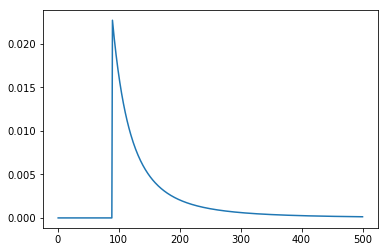

151.84958795903825

In [157]:
values, probabilities = zip(*X.hypotheses.items())
plt.plot(values, probabilities)
plt.show()

Mean(X.hypotheses)

Locomotive problem with a power law prior

$$PMF(x)=\left(\frac{1}{x}\right)^a$$

Where $PMF(x)$ is the probability mass function of x (# of locomotives) and $\alpha$ is a parameter for the power law

In [162]:
class Train(Pmf):
    
    def __init__(self, hypotheses, alpha=1.0):
        self.hypotheses = {}
        for hypothesis in hypotheses:
            self.hypotheses[hypothesis] = (1/hypothesis)**alpha
        self.normalize()
    
    def likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1 / hypo

In [175]:
# for the prior, use a power law with alpha = 1.0
num_trains = 2000
alpha = 1.0
hypotheses = np.arange(1, num_trains+1)
X = Train(hypotheses)

dataset = [60, 30, 90]
for data in dataset:
    X.update(data)
    
Mean(X.hypotheses)

133.99746308073063